In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Admission_Predict.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### dependent variable:Chance of Admit

In [6]:
# here we are droping serial no because it will goes wrong
data=data.drop("Serial No.",axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


###### here all are integer variables

In [8]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
data["Research"].value_counts()

1    219
0    181
Name: Research, dtype: int64

In [10]:
#for proprtion we will use normalize is true 
data["Research"].value_counts(normalize=True)

1    0.5475
0    0.4525
Name: Research, dtype: float64

###### so its is categorical variable

#### Creating a dummy data

In [11]:
import statistics as st

In [12]:
data1=[2,2,5,6,7,2,3,5,9,10,2,4,5,3,7,8]

In [13]:
st.mean(data1)

5

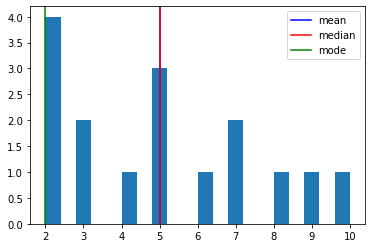

In [25]:
mean=np.mean(data1)
median=np.median(data1)
mode=st.mode(data1) # here numpy had no mode
plt.axvline(mean,color='b',label='mean')#Add a vertical line across the axes.
plt.axvline(median,color='r',label='median')#Add a vertical line across the axes.
plt.axvline(mode,color='g',label='mode')#Add a vertical line across the axes.
plt.legend()#Place a legend on the axes
plt.hist(data1,bins=20) #where bins 
plt.show()

In [26]:
data.mean()

GRE Score            316.807500
TOEFL Score          107.410000
University Rating      3.087500
SOP                    3.400000
LOR                    3.452500
CGPA                   8.598925
Research               0.547500
Chance of Admit        0.724350
dtype: float64

In [28]:
data.median()

GRE Score            317.00
TOEFL Score          107.00
University Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.61
Research               1.00
Chance of Admit        0.73
dtype: float64

In [107]:
data.mode().iloc[0]

GRE Score            312.00
TOEFL Score          110.00
University Rating      3.00
SOP                    3.50
LOR                    3.00
CGPA                   8.00
Research               1.00
Chance of Admit        0.64
Name: 0, dtype: float64

In [34]:
data.quantile(q=0.25)

GRE Score            308.00
TOEFL Score          103.00
University Rating      2.00
SOP                    2.50
LOR                    3.00
CGPA                   8.17
Research               0.00
Chance of Admit        0.64
Name: 0.25, dtype: float64

In [35]:
data.quantile(q=0.75)

GRE Score            325.0000
TOEFL Score          112.0000
University Rating      4.0000
SOP                    4.0000
LOR                    4.0000
CGPA                   9.0625
Research               1.0000
Chance of Admit        0.8300
Name: 0.75, dtype: float64

In [36]:
data["GRE Score"].quantile(q=0.75)

325.0

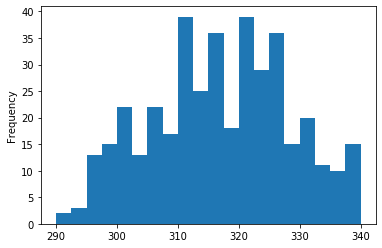

In [38]:
data["GRE Score"].plot.hist(bins=20)

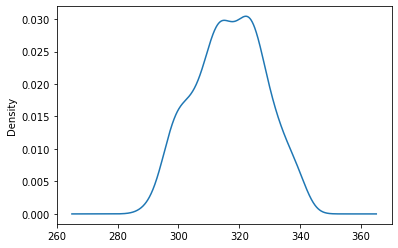

In [39]:
data["GRE Score"].plot.density()

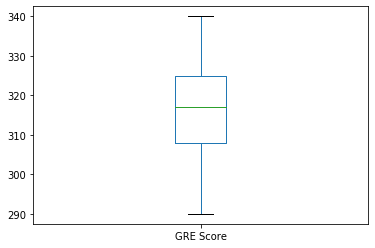

In [40]:
data["GRE Score"].plot.box()

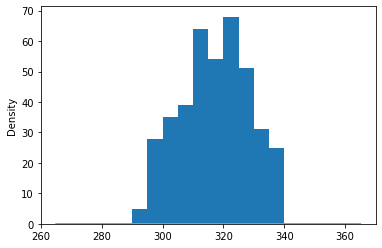

In [41]:
data["GRE Score"].plot.hist()
data["GRE Score"].plot.kde()

##### HERE WE ARE WORKING IN SEABORN 

In [42]:
import seaborn as sns
import numpy as np
import pandas as pd

In [43]:
tips=sns.load_dataset('tips')

In [44]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [53]:
tips["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

#### bar plot in seaborn

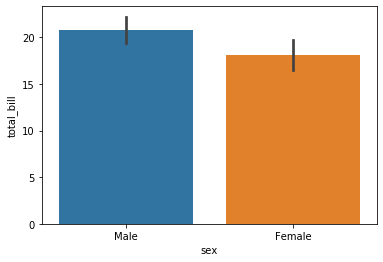

In [54]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.mean) # if you dont give any estimater it should be mean
plt.show()

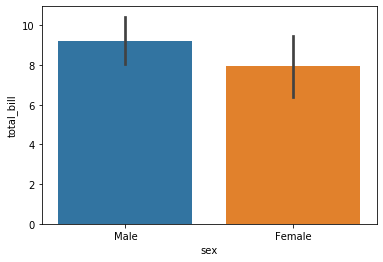

In [49]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std) 
plt.show()

#### count plot

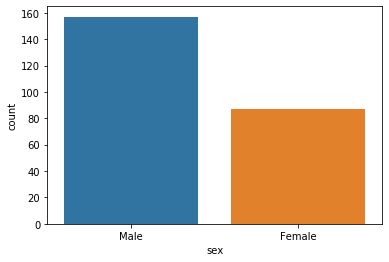

In [56]:
sns.countplot(x="sex",data=tips)

#### box plot

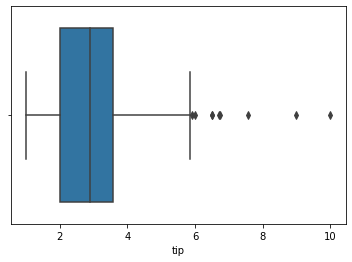

In [59]:
sns.boxplot(x='tip',data=tips)

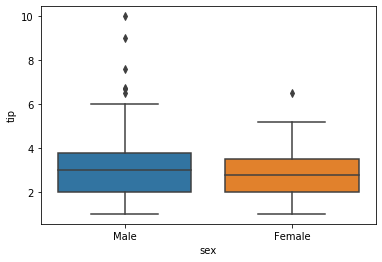

In [60]:
sns.boxplot(x='sex',y='tip',data=tips)

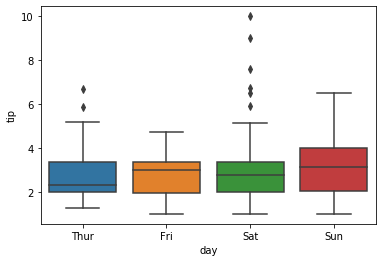

In [61]:
sns.boxplot(x='day',y='tip',data=tips)

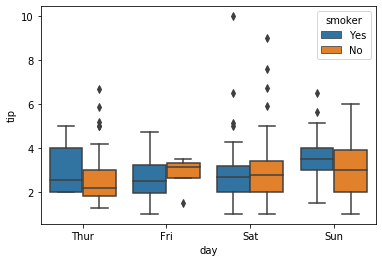

In [62]:
sns.boxplot(x='day',y='tip',hue='smoker',data=tips)

###### sunday smokers are tipping more

### violinplot

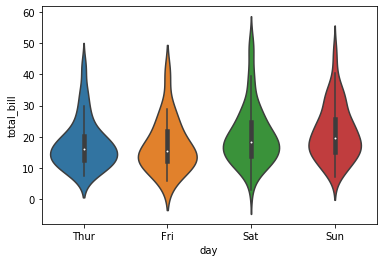

In [66]:
sns.violinplot(x='day',y='total_bill',data=tips)
plt.show()

###### insight:when more people are pay bill between 10 and 20 in sundays

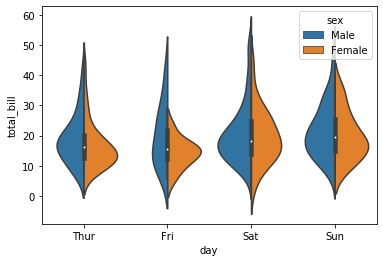

In [68]:
sns.violinplot(x='day',y='total_bill',hue='sex',split=True,data=tips)#split will combined the both male and female
plt.show()

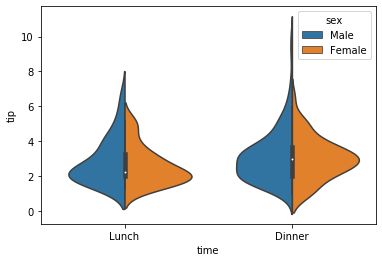

In [70]:
sns.violinplot(x='time',y='tip',hue='sex',split=True,data=tips)#split will combined the both male and female
plt.show()

### distplot

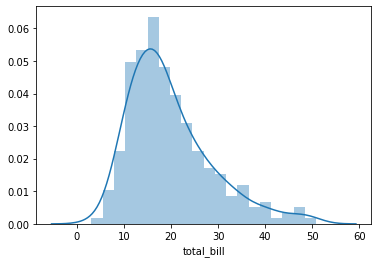

In [72]:
sns.distplot(tips["total_bill"],bins=20)

### jointplot

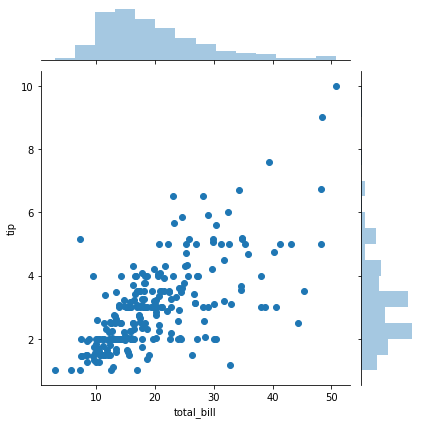

In [73]:
sns.jointplot(x='total_bill',y='tip',data=tips)

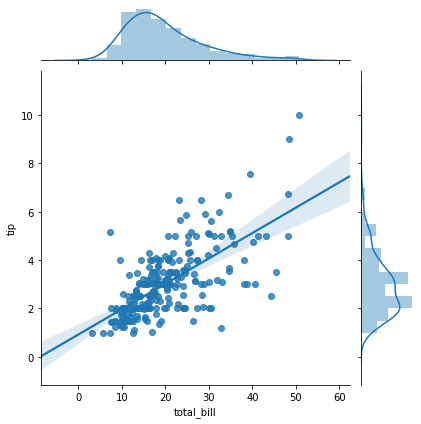

In [74]:
sns.jointplot(x='total_bill',y='tip',kind='reg',data=tips)#Kind of plot to draw.

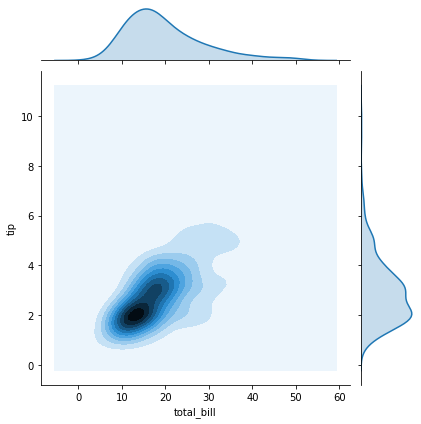

In [75]:
sns.jointplot(x='total_bill',y='tip',kind='kde',data=tips)#Kind of plot to draw.

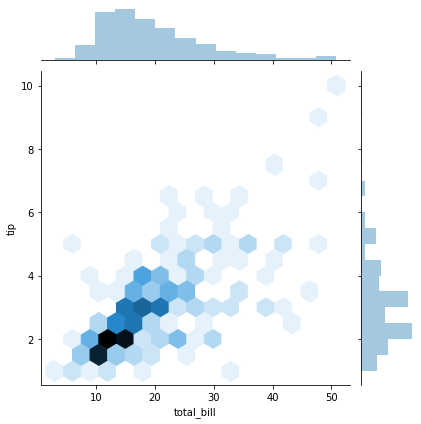

In [76]:
sns.jointplot(x='total_bill',y='tip',kind='hex',data=tips)#Kind of plot to draw.

### pairplot

<Figure size 1080x576 with 0 Axes>

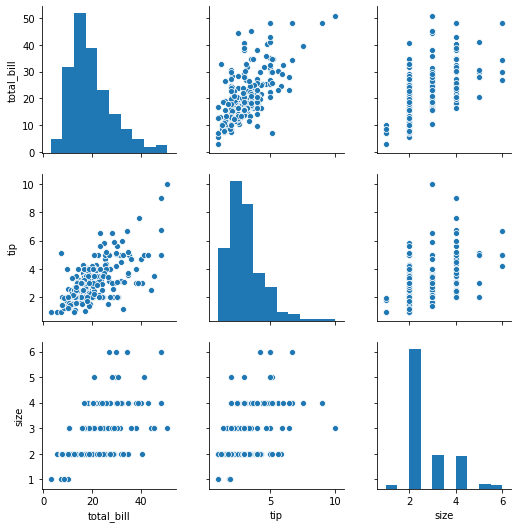

In [78]:
plt.figure(figsize=(15,8))
sns.pairplot(tips)

<Figure size 1080x576 with 0 Axes>

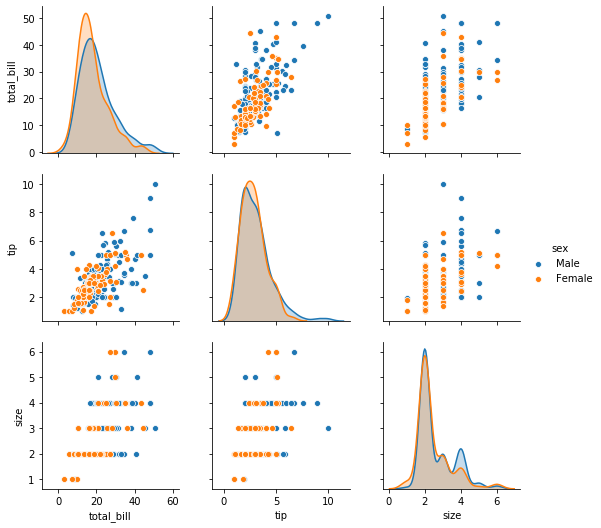

In [79]:
plt.figure(figsize=(15,8))
sns.pairplot(tips,hue="sex",diag_kind='kde')

### JointGrid plot

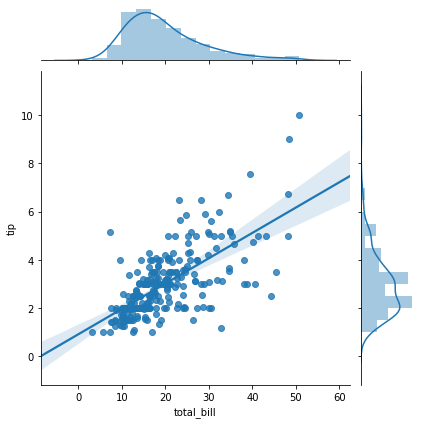

In [83]:
g=sns.JointGrid(x='total_bill',y='tip',data=tips)
g=g.plot(sns.regplot,sns.distplot)

#### corelation

In [84]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


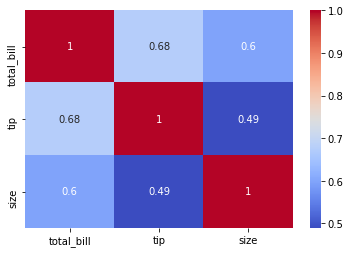

In [87]:
sns.heatmap(tips.corr(),annot=True,cmap='coolwarm')

#### lmplot

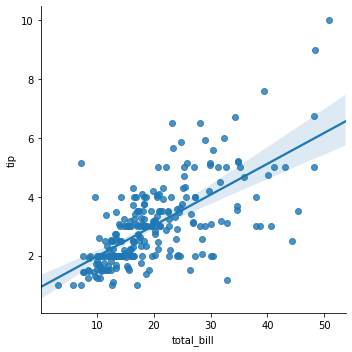

In [88]:
sns.lmplot(x='total_bill',y='tip',data=tips)

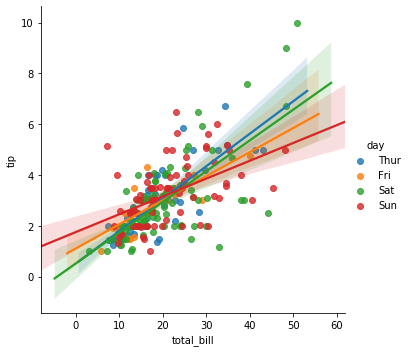

In [90]:
sns.lmplot(x='total_bill',y='tip',hue='day',data=tips)

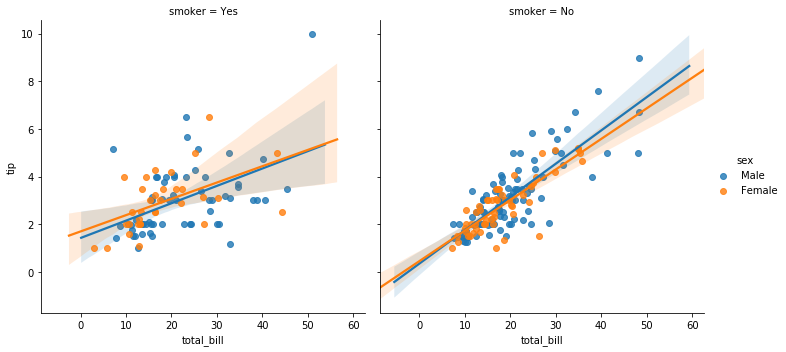

In [92]:
sns.lmplot(x='total_bill',y='tip',col='smoker',hue='sex',data=tips)

## multiplots

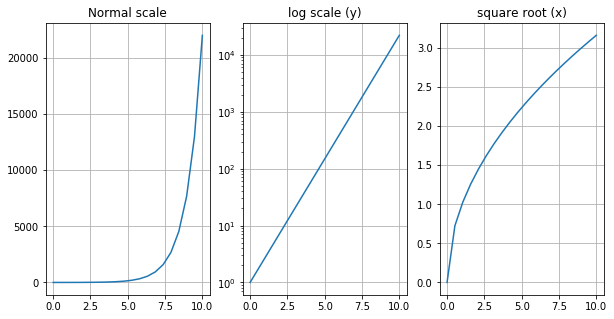

In [102]:
x=np.linspace(0,10,20)
fig,axes=plt.subplots(1,3,figsize=(10,5))
axes[0].plot(x,np.exp(x))
axes[0].set_title("Normal scale")
axes[0].grid(True)
axes[1].plot(x,np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("log scale (y)")
axes[1].grid(True)
axes[2].plot(x,np.sqrt(x))
axes[2].set_title("square root (x)")
axes[2].grid(True)
plt.show()

### twin axis

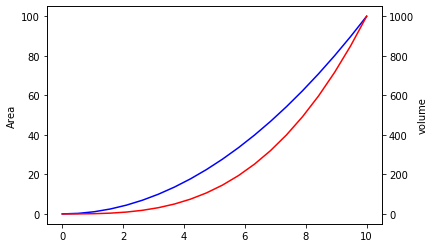

In [103]:
fig,ax1=plt.subplots()
ax1.plot(x,x**2,color='b')
ax1.set_ylabel("Area")
ax2=ax1.twinx()
ax2.plot(x,x**3,color='r')
ax2.set_ylabel("volume")
plt.show()

Text(0.5, 1.0, 'fill_between')

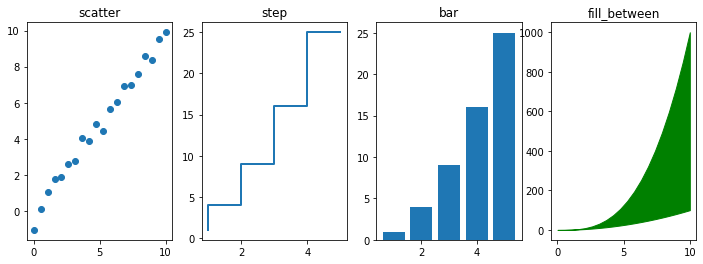

In [105]:
n=np.array([1,2,3,4,5])
fig,axes=plt.subplots(1,4,figsize=(12,4))

axes[0].scatter(x,x+0.5*np.random.randn(len(x)))
axes[0].set_title("scatter")

axes[1].step(n,n**2,lw=2)
axes[1].set_title("step")


axes[2].bar(n,n**2)
axes[2].set_title("bar")

axes[3].fill_between(x,x**2,x**3,color="g")
axes[3].set_title("fill_between")
